### Keras

- 빠른 모형 프로토타이핑을 통한 연구 효율 증대 
- API사용이 쉽고 오사용으로 인한 시행착오를 줄여준다. 
- GPU, CPU 모두 사용 가능 
- 다양한 backend 활용 가능

#### R interface to Keras

- Python 버전의 Keras를 R에서 활용 가능하게 Wrapping한 패키지 
- R의 강점을 딥러닝을 하는데 활용 가능 
- 간결한 API, 복잡한 `import`사용을 하지 않아도 된다. 
- reticulate 기반으로 동작해 keras의 최신 기능을 바로 활용 가능하다. 

### Keras 설치 

> devtools::install_github("rstudio/keras")


> library(keras)

> install_tensorflow()

### A first neural network in Keras

In [1]:
library(keras)

#### 데이터 로딩과 샘플 플로팅 

In [23]:
batch_size <- 128
num_classes <- 10
epochs <- 30

# the data, shuffled and split between train and test sets
mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y

In [24]:
x_train <- array(as.numeric(x_train), dim = c(dim(x_train)[[1]], 784))
x_test <- array(as.numeric(x_test), dim = c(dim(x_test)[[1]], 784))

x_train <- x_train / 255
x_test <- x_test / 255

# convert class vectors to binary class matrices
y_train <- to_categorical(y_train, num_classes)
y_test <- to_categorical(y_test, num_classes)


print(sprintf("x_train dimension : %d, %d", dim(x_train)[1], dim(x_train)[2]))
print(sprintf("y_train dimension : %d, %d", dim(y_train)[1], dim(y_train)[2]))


[1] "x_train dimension : 60000, 784"
[1] "y_train dimension : 60000, 10"


In [4]:
plot_examples <- function(data, labels, model_predict){
    par(mfrow=c(2,4))
    for(i in 1:8){
        idx <- sample(seq(dim(data)[2]), 1)
        lab <- paste0("num: " , which.max(labels[idx,]) - 1 , "," , which.max(model_predict[idx,]) - 1)
        image(t(apply(array(data[idx,], dim = c(28,28)), 2, rev)), col=paste("gray",1:99,sep=""),main=lab)
    }
}

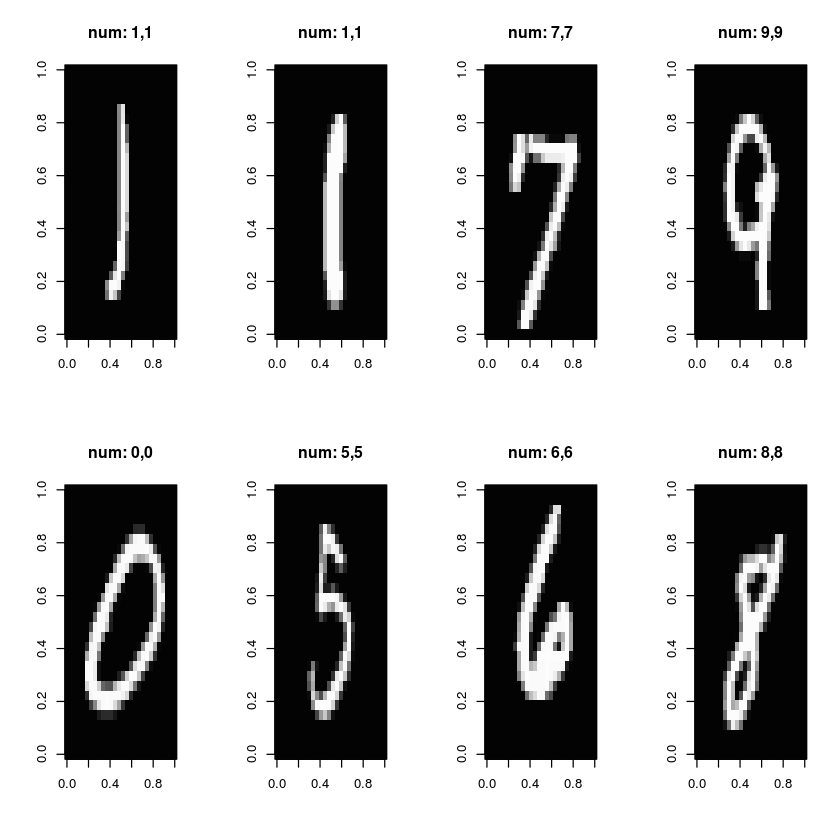

In [5]:
plot_examples(x_train, y_train, y_train)

In [25]:

# input layer
inputs <- layer_input(shape = c(784))
 
# outputs compose input + dense layers
predictions <- inputs %>%
  layer_dense(units = 64, activation = 'relu') %>% 
  layer_dense(units = 64, activation = 'relu') %>% 
  layer_dense(units = 10, activation = 'softmax')

# create and compile model
model <- keras_model(inputs = inputs, outputs = predictions)

summary(model)

model %>% compile(
  optimizer = 'rmsprop',
  loss = 'categorical_crossentropy',
  metrics = c('accuracy')
)

history <- model %>% fit(
  x_train, y_train,
  batch_size = batch_size,
  epochs = epochs,
  verbose = 1,
  callbacks = callback_tensorboard(log_dir = "logs/run_b"),
  validation_split = 0.2
)
  
score <- model %>% evaluate(
  x_test, y_test,
  verbose = 0
)
  
cat('Test loss:', score[[1]], '\n')
cat('Test accuracy:', score[[2]], '\n')

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input_2 (InputLayer)                (None, 784)                     0           
________________________________________________________________________________
dense_4 (Dense)                     (None, 64)                      50240       
________________________________________________________________________________
dense_5 (Dense)                     (None, 64)                      4160        
________________________________________________________________________________
dense_6 (Dense)                     (None, 10)                      650         
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
________________________________________________________________________________

 
Test loss: 0.1619006 
Test accuracy: 0.9727 
